# Hands-On Data Preprocessing in Python
Learn how to effectively prepare data for successful data analytics
    
    AUTHOR: Dr. Roy Jafari 

### Chapter 1: Review of the core modules NumPy, Pandas, and Matplotlib

##### Excercise 1
Use the adult.csv dataset and run the codes shown in the following Screenshots. Then answer the questions.

In [1]:
import pandas as pd
import numpy as np
adult_df = pd.read_csv('adult.csv')
adult_df.set_index(np.arange(10000,42561),inplace=True)

print(adult_df.iloc[5:7,0:2])

print(adult_df.loc['10005':'10007','age':'fnlwgt'])

       age workclass
10005   37   Private
10006   49   Private
       age         workclass  fnlwgt
10005   37           Private  284582
10006   49           Private  160187
10007   52  Self-emp-not-inc  209642


    a) Use the output to answer what is the difference in the behavior of .loc and .iloc when it comes to slicing.
    b)	Without running but by only looking at the data, what will be the output of adult_df.loc['10000':'10003', 'relationship':'sex'].
    c)	Without running but by only looking at the data, what will be the output of adult_df.iloc[0:3, 7:9].


a) iloc's lower bound is exclusive, loc's lower bound is inclusive

b) 
            relationship    race    sex
10000      Not-in-family   White   Male
10001            Husband   White   Male
10002      Not-in-family   White   Male
10003            Husband   Black   Male

c) 
            relationship    race
10000      Not-in-family   White
10001            Husband   White
10002      Not-in-family   White

##### Excercise 2 

For adult_df use the .groupby() function to run the following code and create the multi-index Series mlt_sr.

In [2]:
import pandas as pd

adult_df = pd.read_csv('adult.csv')
mlt_seris =adult_df.groupby(['race','sex','income']).fnlwgt.mean()
mlt_seris

race                sex     income
Amer-Indian-Eskimo  Female  <=50K     109018.626168
                            >50K      148012.000000
                    Male    <=50K     126428.767857
                            >50K      120721.541667
Asian-Pac-Islander  Female  <=50K     148165.333333
                            >50K      142426.093023
                    Male    <=50K     163885.130435
                            >50K      170698.347639
Black               Female  <=50K     213411.580205
                            >50K      205806.033333
                    Male    <=50K     242343.990566
                            >50K      245390.356902
Other               Female  <=50K     173235.932039
                            >50K      160223.333333
                    Male    <=50K     214891.832168
                            >50K      204551.736842
White               Female  <=50K     183485.120961
                            >50K      184030.255837
                    Male    <

Now that you have created a multi-index Series, run the following codes, study the outputs, and answer the questions.

    a)	Run the code below first and then answer the following. When we use .iloc[] for a multi-index Series or DataFrame, what we should expect?

In [3]:
print(mlt_seris.iloc[0])
print(mlt_seris.iloc[1])
print(mlt_seris.iloc[2])

109018.6261682243
148012.0
126428.76785714286


Answer: 

.iloc[] selects rows and columns by their integer positions

    b)	Run the code below first and then answer the following. When we use .loc[] to access the data of one of the inner most index level of multi-index Series, what should we expect?

In [5]:
mlt_seris.loc['Other']

sex     income
Female  <=50K     173235.932039
        >50K      160223.333333
Male    <=50K     214891.832168
        >50K      204551.736842
Name: fnlwgt, dtype: float64

Answer: 

.loc[] selects data based on index labels, not positions.

    c)	 Run the codes below first and then answer the following. When we use .loc[] to access the data of one of non inner most index level of multi-index Series, what should we expect? 

    When you run either line of code below, you will get an error and that is the point of this question. Study the error and try to answer the question. 

In [6]:
mlt_seris.loc['Female']

KeyError: 'Female'

In [7]:
mlt_seris.loc['<=50K']

KeyError: '<=50K'

Answer: 

error

    d)	Run the codes below first and then answer the following. How is using .loc[] or .iloc[] different when working with a multi-index Series or a DataFrame?


In [9]:
print(mlt_seris.loc['Other']['Female']['<=50K'])
print(mlt_seris.iloc[12])

173235.93203883496
173235.93203883496


Answer: 

Using .loc[] is label-based (selects by index names at any level), while .iloc[] is position-based (ignores index labels and selects by integer position).

##### Excercise 3
For this exercise you need to use a new dataset: billboard.csv. Visit https://www.billboard.com/charts/hot-100 and see the latest song rankings of the day. This dataset presents information and ranking of 317 song tracks in 80 columns. The first four columns are artist, track, time, and date_e. The first columns are intuitive descriptions of song tracks. The column date_e shows the date that the songs entered the hot-100 list. The rest of 76 columns are songs ranking at the end of each weeks from 'w1' to 'w76'. Download and read this dataset using pandas and answer the following questions.

In [12]:
import pandas as pd

billboard_df = pd.read_csv("billboard.csv")
billboard_df.head()

,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w67,w68,w69,w70,w71,w72,w73,w74,w75,w76
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    a)	Write one line of code that gives you a great idea of how many null values each column has. If there are any columns that have no non-null values drop them. 

In [17]:
print(billboard_df.isnull().sum())
billboard_df = billboard_df.dropna(axis=1, how='all')

artist      0
track       0
time        0
date_e      0
w1          0
         ... 
w72       317
w73       317
w74       317
w75       317
w76       317
Length: 80, dtype: int64


In [19]:
print(billboard_df.isnull().sum())
billboard_df

artist      0
track       0
time        0
date_e      0
w1          0
         ... 
w61       315
w62       315
w63       315
w64       315
w65       316
Length: 69, dtype: int64


,artist,track,time,date_e,w1,w2,w3,w4,w5,w6,...,w56,w57,w58,w59,w60,w61,w62,w63,w64,w65
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0,33.0,23.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0,5.0,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0,31.0,20.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0,14.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0,29.0,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,98,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,"Smith, Will",Freakin' It,3:58,2000-02-12,99,99.0,99.0,99.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,Zombie Nation,Kernkraft 400,3:30,2000-09-02,99,99.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,"Eastsidaz, The",Got Beef,3:58,2000-07-01,99,99.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


    b)	With a for loop, draw and study the values in each of the remaining W columns.


--- Column: w1 ---
count    317.000000
mean      79.958991
std       14.686865
min       15.000000
25%       74.000000
50%       81.000000
75%       91.000000
max      100.000000
Name: w1, dtype: float64


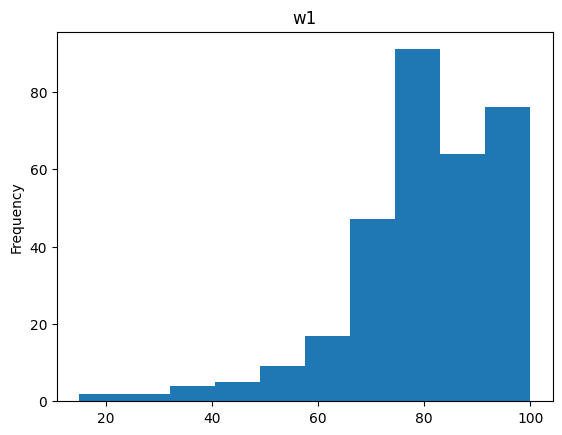


--- Column: w2 ---
count    312.000000
mean      71.173077
std       18.200443
min        8.000000
25%       63.000000
50%       73.000000
75%       84.000000
max      100.000000
Name: w2, dtype: float64


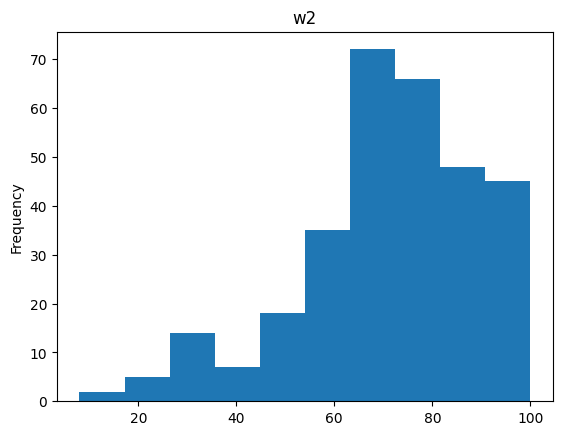


--- Column: w3 ---
count    307.000000
mean      65.045603
std       20.752302
min        6.000000
25%       53.000000
50%       66.000000
75%       79.000000
max      100.000000
Name: w3, dtype: float64


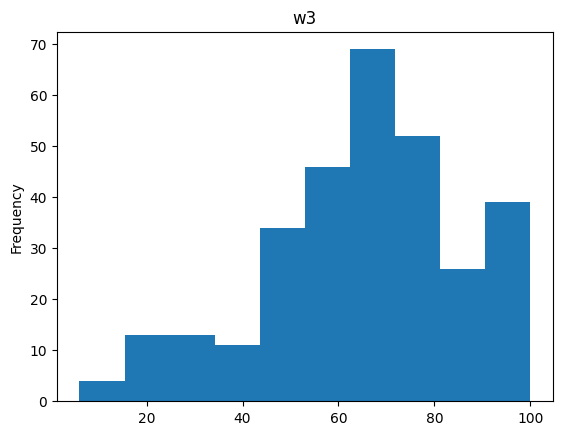


--- Column: w4 ---
count    300.000000
mean      59.763333
std       22.324619
min        5.000000
25%       44.750000
50%       61.000000
75%       76.000000
max      100.000000
Name: w4, dtype: float64


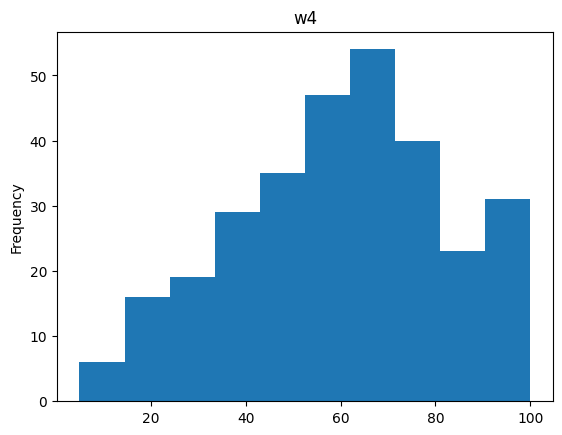


--- Column: w5 ---
count    292.000000
mean      56.339041
std       23.780022
min        2.000000
25%       38.750000
50%       57.000000
75%       73.250000
max      100.000000
Name: w5, dtype: float64


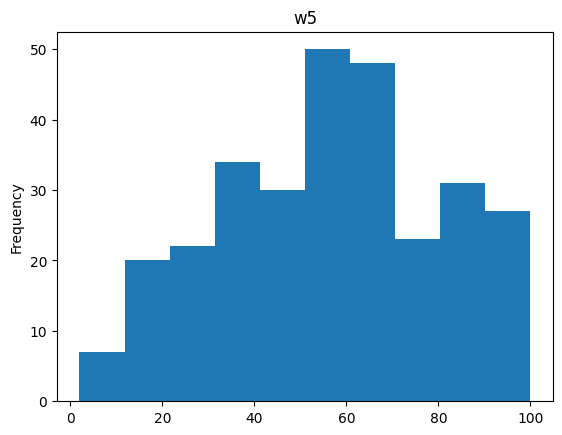


--- Column: w6 ---
count    280.000000
mean      52.360714
std       24.473273
min        1.000000
25%       33.750000
50%       51.500000
75%       72.250000
max       99.000000
Name: w6, dtype: float64


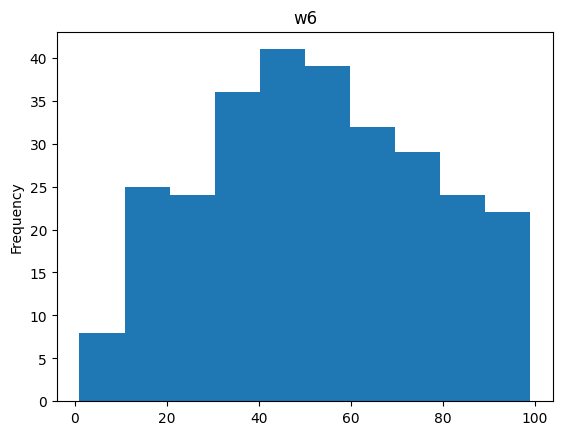


--- Column: w7 ---
count    269.000000
mean      49.219331
std       25.654279
min        1.000000
25%       30.000000
50%       47.000000
75%       67.000000
max      100.000000
Name: w7, dtype: float64


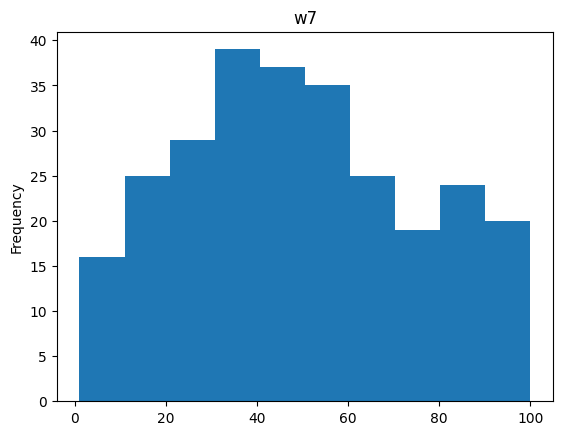


--- Column: w8 ---
count    260.000000
mean      47.119231
std       26.370782
min        1.000000
25%       27.000000
50%       45.500000
75%       67.000000
max       99.000000
Name: w8, dtype: float64


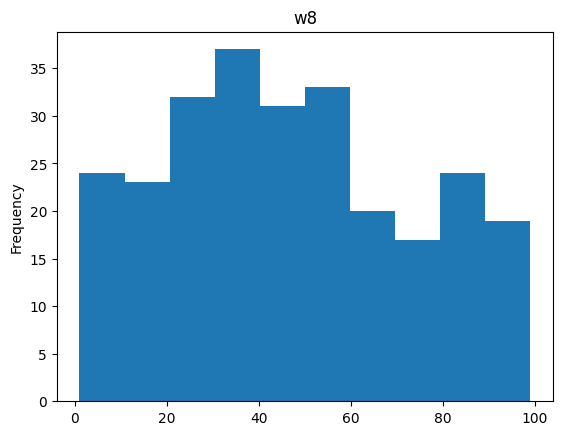


--- Column: w9 ---
count    253.000000
mean      46.343874
std       27.136419
min        1.000000
25%       26.000000
50%       42.000000
75%       67.000000
max      100.000000
Name: w9, dtype: float64


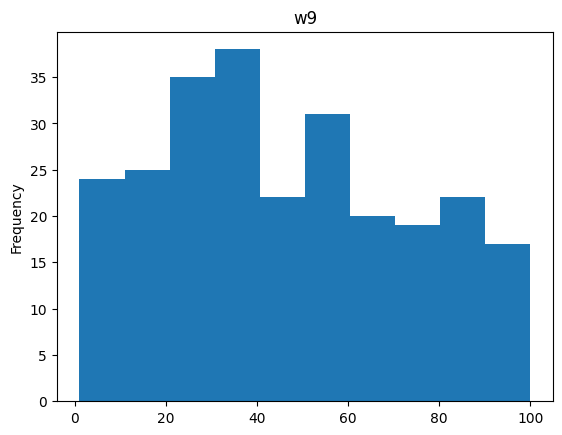


--- Column: w10 ---
count    244.000000
mean      45.786885
std       28.152357
min        1.000000
25%       24.750000
50%       40.000000
75%       69.000000
max      100.000000
Name: w10, dtype: float64


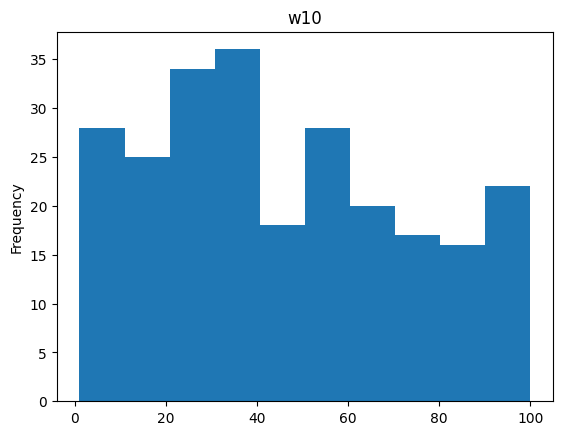


--- Column: w11 ---
count    236.000000
mean      45.474576
std       29.060527
min        1.000000
25%       22.000000
50%       42.500000
75%       69.250000
max      100.000000
Name: w11, dtype: float64


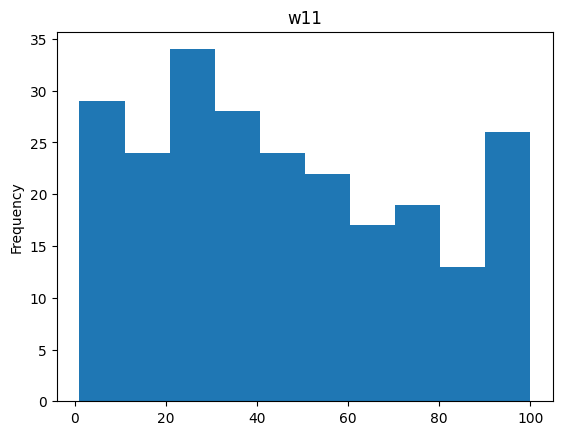


--- Column: w12 ---
count    222.000000
mean      44.198198
std       28.893100
min        1.000000
25%       20.250000
50%       42.000000
75%       67.750000
max      100.000000
Name: w12, dtype: float64


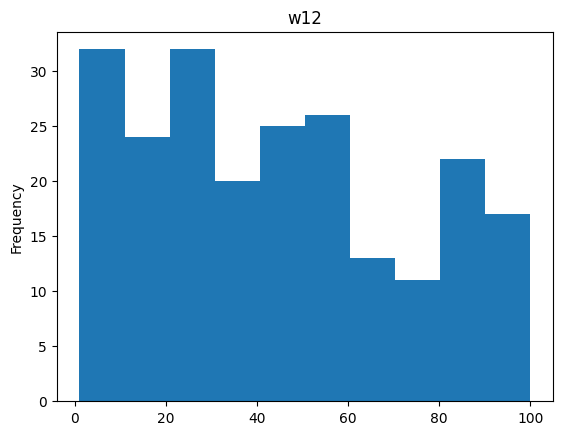


--- Column: w13 ---
count    210.000000
mean      44.352381
std       29.481315
min        1.000000
25%       19.000000
50%       42.500000
75%       68.750000
max      100.000000
Name: w13, dtype: float64


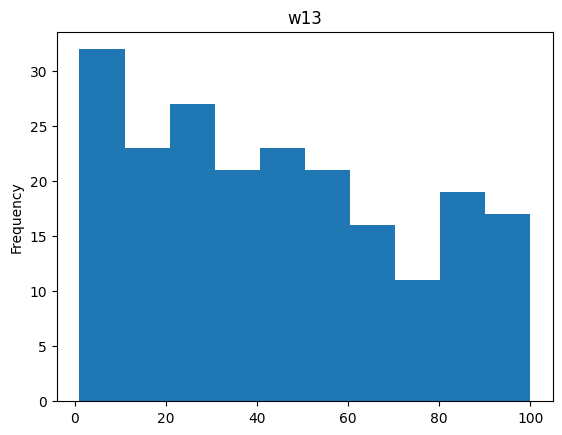


--- Column: w14 ---
count    204.000000
mean      45.892157
std       30.529936
min        1.000000
25%       20.000000
50%       44.000000
75%       72.500000
max      100.000000
Name: w14, dtype: float64


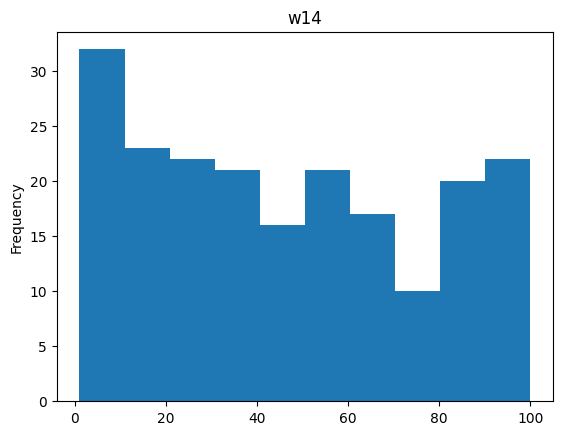


--- Column: w15 ---
count    197.000000
mean      47.898477
std       31.542486
min        1.000000
25%       18.000000
50%       46.000000
75%       76.000000
max      100.000000
Name: w15, dtype: float64


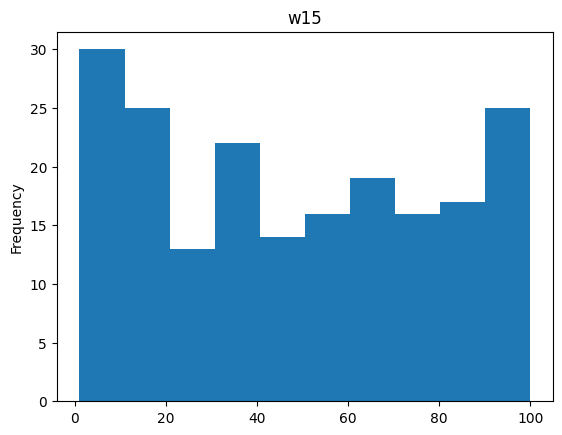


--- Column: w16 ---
count    182.000000
mean      48.241758
std       31.899476
min        1.000000
25%       17.000000
50%       47.000000
75%       76.000000
max      100.000000
Name: w16, dtype: float64


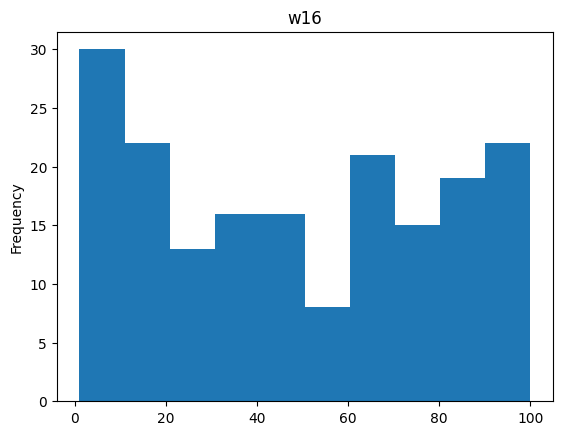


--- Column: w17 ---
count    177.000000
mean      51.265537
std       33.093233
min        1.000000
25%       19.000000
50%       52.000000
75%       85.000000
max      100.000000
Name: w17, dtype: float64


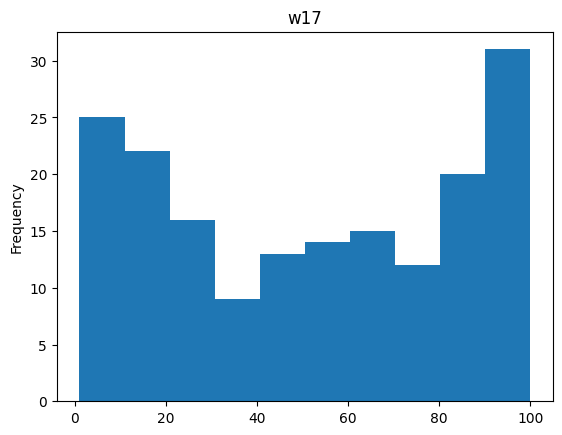


--- Column: w18 ---
count    166.000000
mean      52.108434
std       33.194199
min        1.000000
25%       19.000000
50%       56.500000
75%       84.000000
max      100.000000
Name: w18, dtype: float64


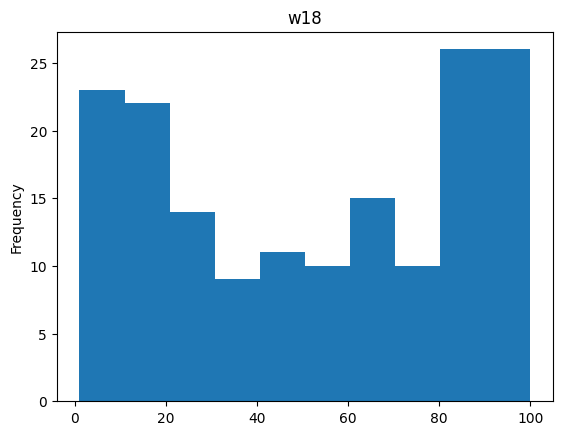


--- Column: w19 ---
count    156.000000
mean      53.166667
std       33.022540
min        1.000000
25%       20.750000
50%       55.500000
75%       85.000000
max       99.000000
Name: w19, dtype: float64


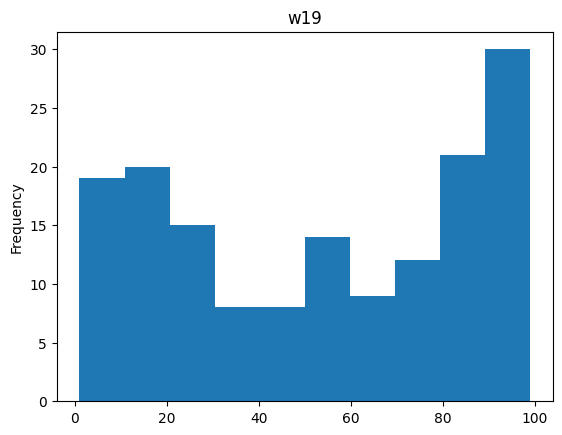


--- Column: w20 ---
count    146.000000
mean      54.267123
std       32.890475
min        2.000000
25%       22.250000
50%       58.500000
75%       87.000000
max      100.000000
Name: w20, dtype: float64


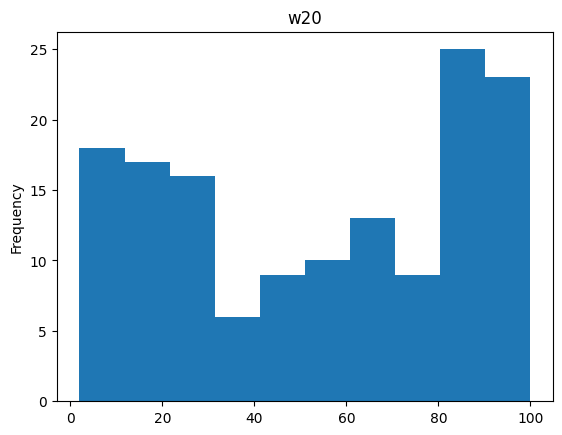


--- Column: w21 ---
count    65.000000
mean     26.184615
std      20.232162
min       3.000000
25%      10.000000
50%      24.000000
75%      35.000000
max      97.000000
Name: w21, dtype: float64


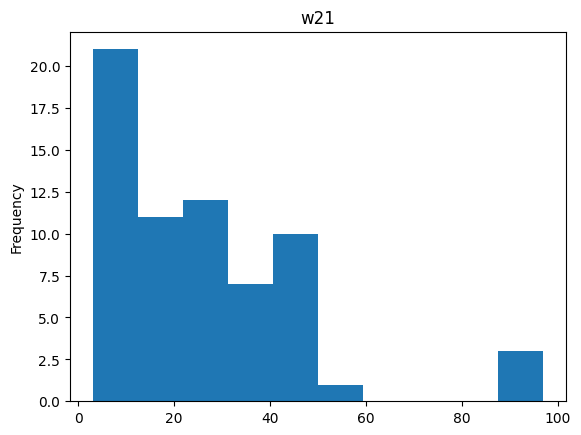


--- Column: w22 ---
count     55.000000
mean      25.636364
std       21.127798
min        3.000000
25%        9.000000
50%       21.000000
75%       36.500000
max      100.000000
Name: w22, dtype: float64


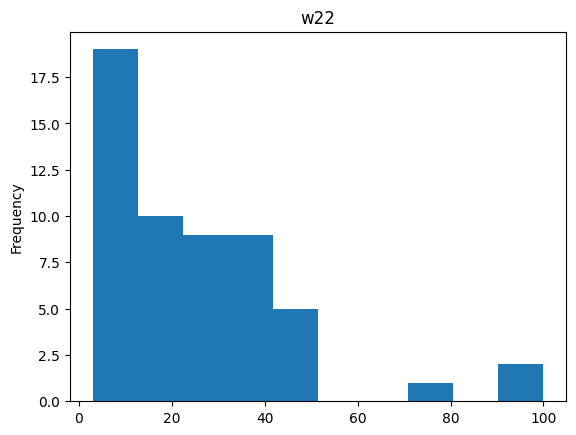


--- Column: w23 ---
count    48.00000
mean     23.81250
std      18.23564
min       3.00000
25%      10.00000
50%      20.50000
75%      36.00000
max      91.00000
Name: w23, dtype: float64


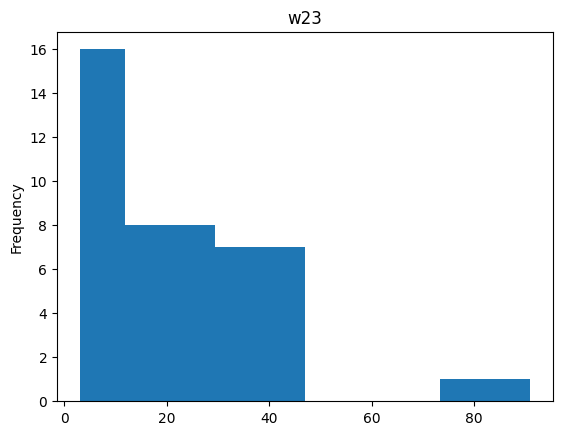


--- Column: w24 ---
count    46.000000
mean     26.782609
std      18.556716
min       3.000000
25%      12.000000
50%      21.500000
75%      40.500000
max      91.000000
Name: w24, dtype: float64


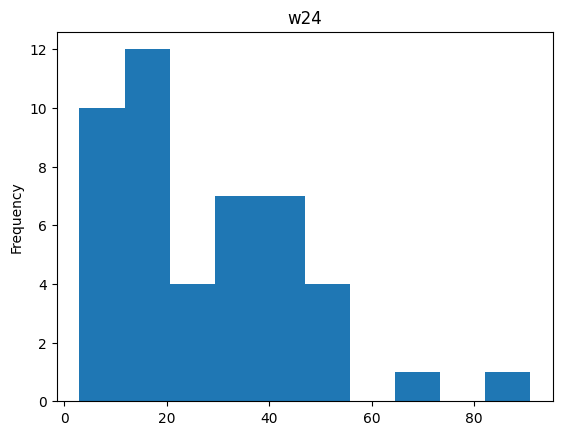


--- Column: w25 ---
count    38.000000
mean     26.131579
std      18.737404
min       2.000000
25%      12.250000
50%      22.500000
75%      38.250000
max      90.000000
Name: w25, dtype: float64


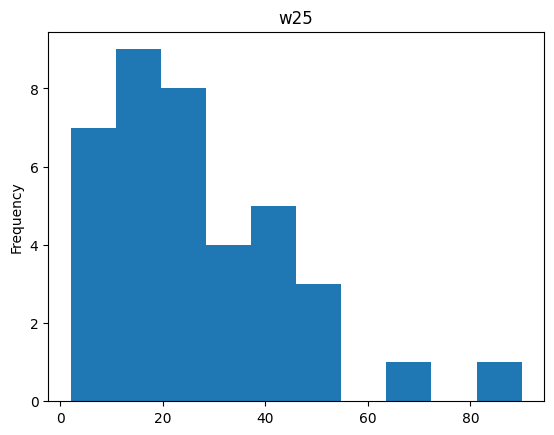


--- Column: w26 ---
count    36.00000
mean     28.00000
std      19.14904
min       1.00000
25%      13.75000
50%      26.00000
75%      40.25000
max      89.00000
Name: w26, dtype: float64


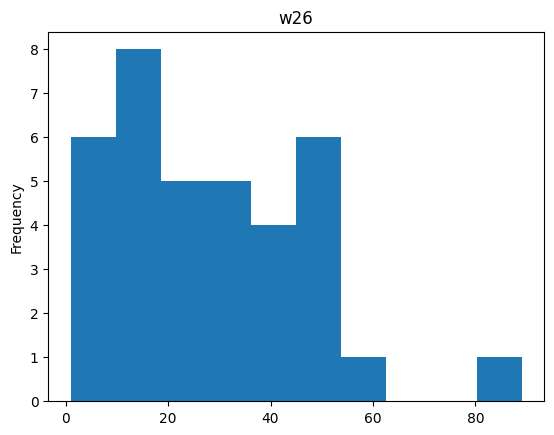


--- Column: w27 ---
count    29.000000
mean     27.344828
std      19.736254
min       1.000000
25%      12.000000
50%      26.000000
75%      38.000000
max      86.000000
Name: w27, dtype: float64


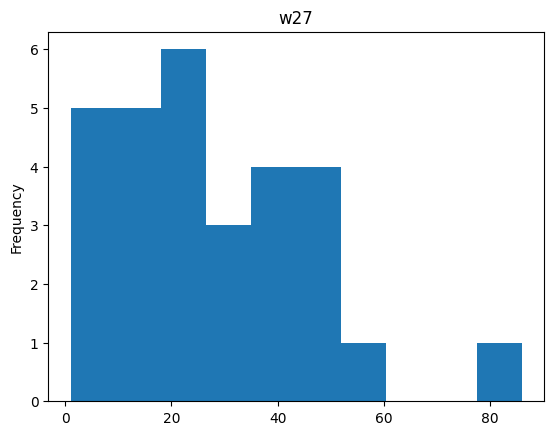


--- Column: w28 ---
count    24.000000
mean     25.000000
std      16.229335
min       2.000000
25%      14.500000
50%      23.500000
75%      37.500000
max      58.000000
Name: w28, dtype: float64


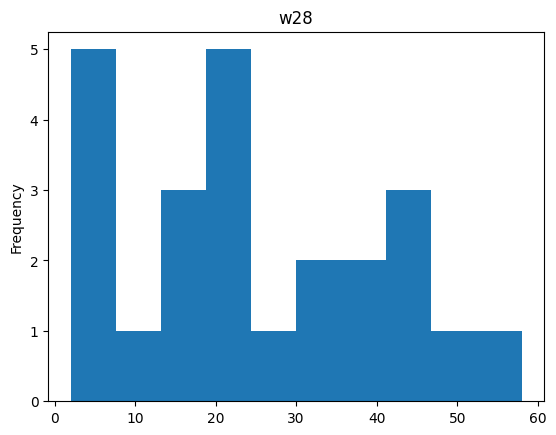


--- Column: w29 ---
count    20.000000
mean     23.650000
std      15.239405
min       2.000000
25%      13.750000
50%      22.500000
75%      36.000000
max      49.000000
Name: w29, dtype: float64


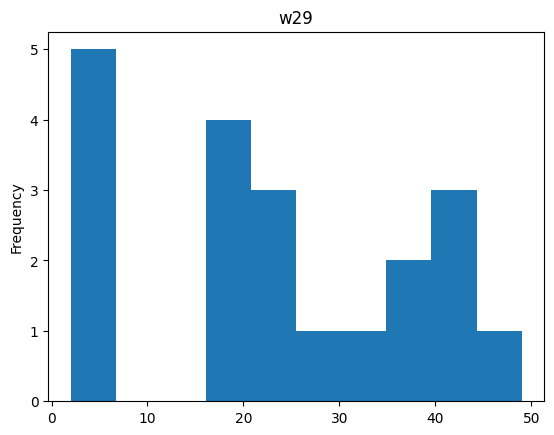


--- Column: w30 ---
count    20.000000
mean     26.400000
std      15.104548
min       2.000000
25%      16.000000
50%      31.500000
75%      38.000000
max      45.000000
Name: w30, dtype: float64


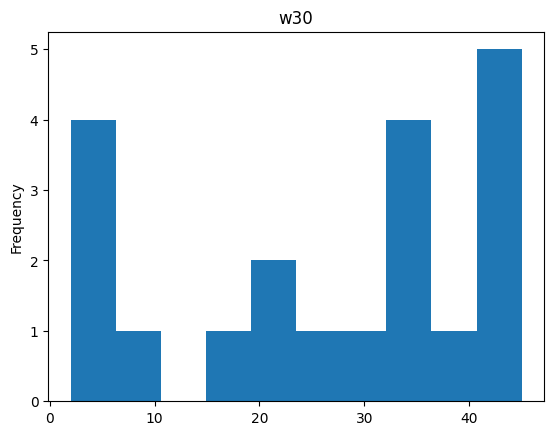


--- Column: w31 ---
count    19.000000
mean     28.736842
std      16.002924
min       3.000000
25%      16.000000
50%      34.000000
75%      41.000000
max      49.000000
Name: w31, dtype: float64


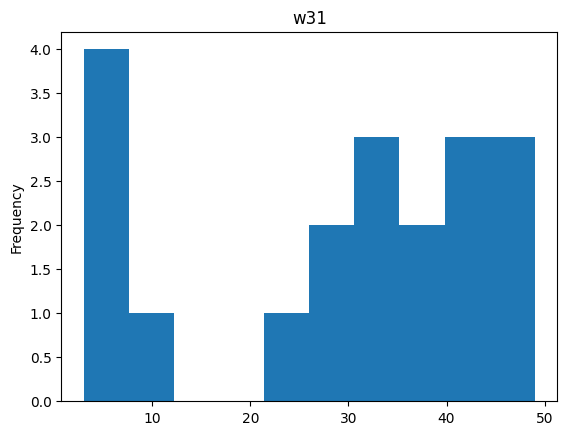


--- Column: w32 ---
count    18.000000
mean     30.277778
std      17.032169
min       3.000000
25%      14.500000
50%      38.000000
75%      44.000000
max      47.000000
Name: w32, dtype: float64


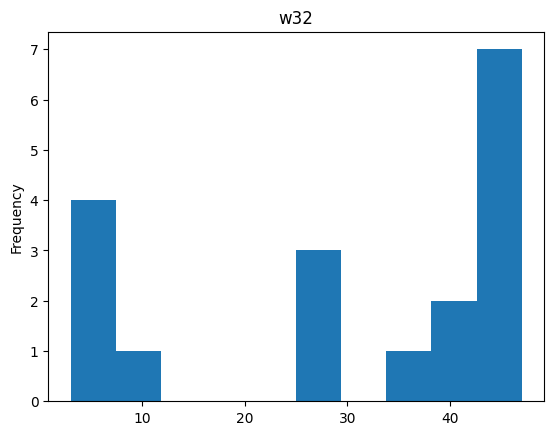


--- Column: w33 ---
count    12.000000
mean     23.166667
std      17.071152
min       2.000000
25%       5.500000
50%      24.000000
75%      36.250000
max      50.000000
Name: w33, dtype: float64


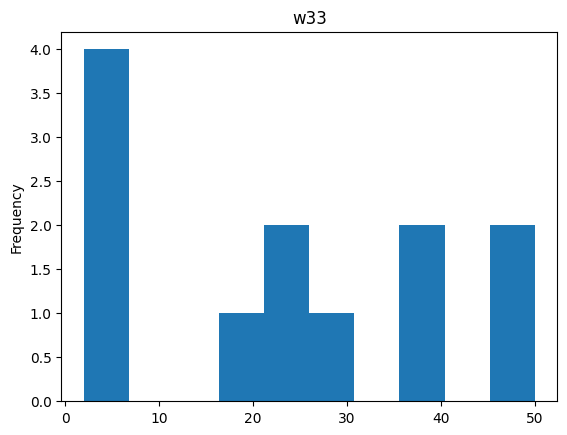


--- Column: w34 ---
count    10.000000
mean     19.300000
std      14.929836
min       3.000000
25%       5.750000
50%      18.500000
75%      28.250000
max      49.000000
Name: w34, dtype: float64


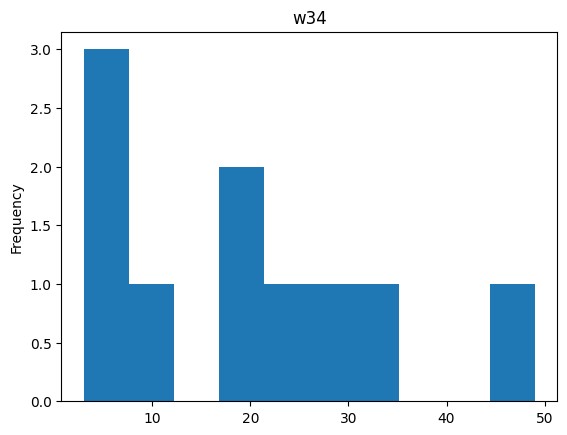


--- Column: w35 ---
count     9.000000
mean     16.888889
std      12.333333
min       4.000000
25%       5.000000
50%      14.000000
75%      27.000000
max      34.000000
Name: w35, dtype: float64


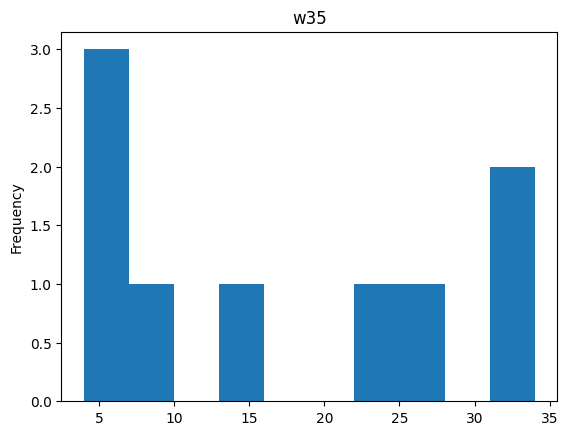


--- Column: w36 ---
count     9.000000
mean     18.555556
std      13.893444
min       5.000000
25%       6.000000
50%      16.000000
75%      29.000000
max      41.000000
Name: w36, dtype: float64


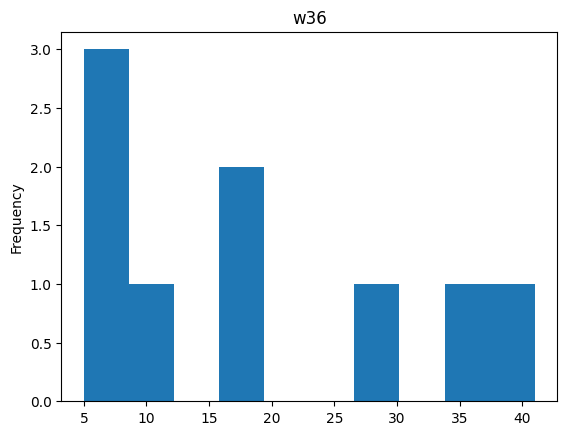


--- Column: w37 ---
count     9.000000
mean     20.888889
std      15.799086
min       5.000000
25%       9.000000
50%      16.000000
75%      36.000000
max      48.000000
Name: w37, dtype: float64


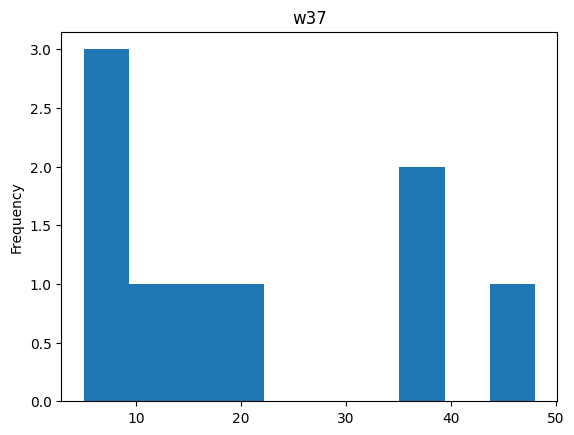


--- Column: w38 ---
count     8.000000
mean     19.375000
std      12.693502
min       9.000000
25%       9.000000
50%      16.000000
75%      23.000000
max      40.000000
Name: w38, dtype: float64


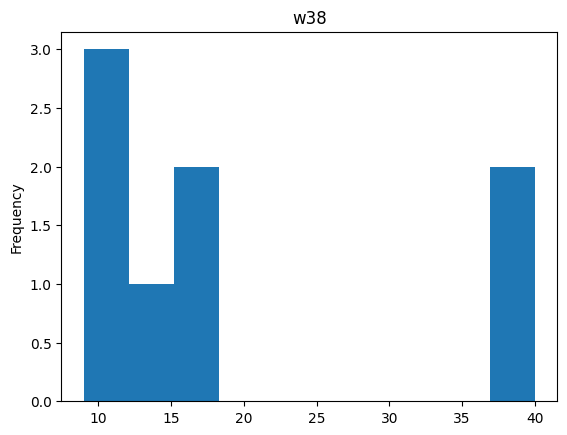


--- Column: w39 ---
count     8.000000
mean     20.250000
std      18.289341
min       3.000000
25%       8.750000
50%      13.000000
75%      25.500000
max      50.000000
Name: w39, dtype: float64


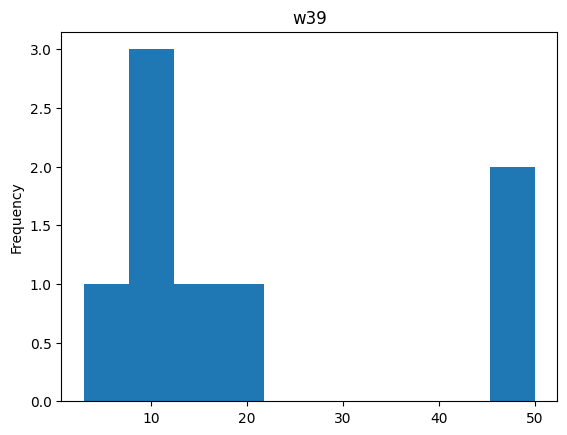


--- Column: w40 ---
count     7.000000
mean     17.857143
std      14.264508
min       1.000000
25%      13.000000
50%      14.000000
75%      18.500000
max      47.000000
Name: w40, dtype: float64


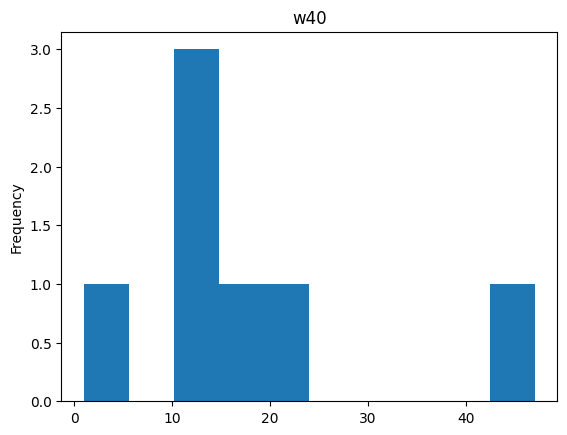


--- Column: w41 ---
count     7.000000
mean     18.571429
std      15.306395
min       1.000000
25%      13.000000
50%      14.000000
75%      19.500000
max      50.000000
Name: w41, dtype: float64


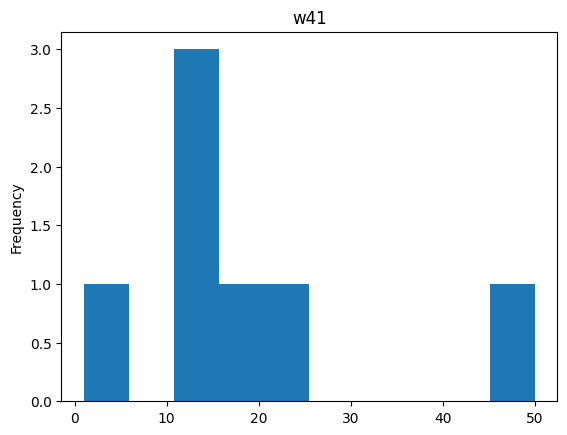


--- Column: w42 ---
count     6.000000
mean     14.166667
std       7.250287
min       2.000000
25%      11.500000
50%      15.000000
75%      19.250000
max      22.000000
Name: w42, dtype: float64


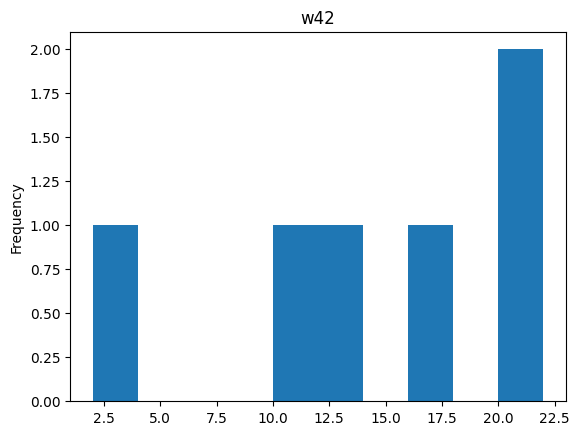


--- Column: w43 ---
count     6.000000
mean     17.666667
std      10.366613
min       3.000000
25%      11.750000
50%      18.000000
75%      23.500000
max      32.000000
Name: w43, dtype: float64


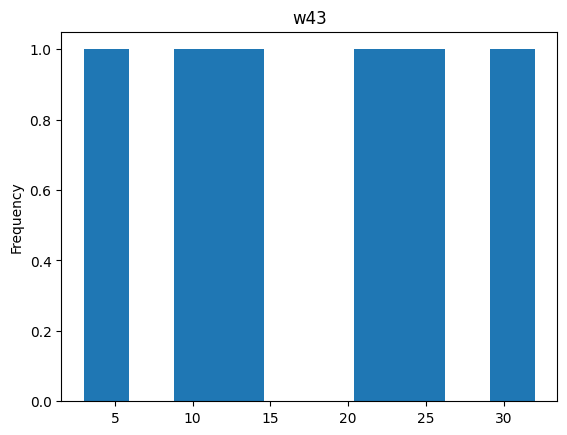


--- Column: w44 ---
count     6.000000
mean     21.666667
std      15.081998
min       4.000000
25%      10.750000
50%      21.000000
75%      29.000000
max      45.000000
Name: w44, dtype: float64


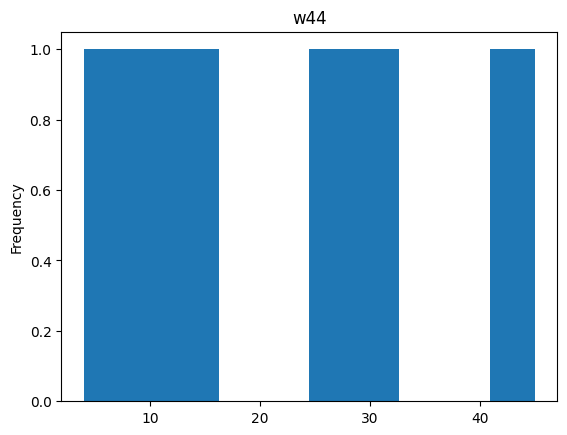


--- Column: w45 ---
count     5.000000
mean     17.800000
std      11.691878
min       4.000000
25%       9.000000
50%      17.000000
75%      28.000000
max      31.000000
Name: w45, dtype: float64


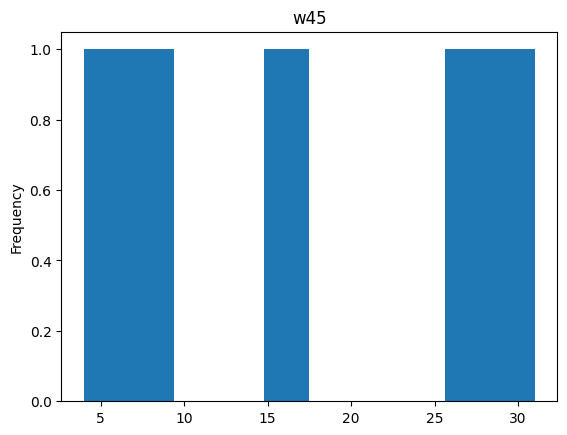


--- Column: w46 ---
count     5.000000
mean     20.200000
std      14.184499
min       5.000000
25%       7.000000
50%      21.000000
75%      31.000000
max      37.000000
Name: w46, dtype: float64


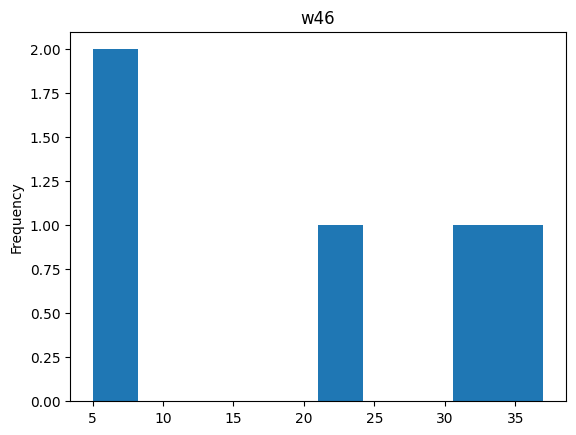


--- Column: w47 ---
count     5.000000
mean     22.800000
std      16.543881
min       6.000000
25%       7.000000
50%      22.000000
75%      38.000000
max      41.000000
Name: w47, dtype: float64


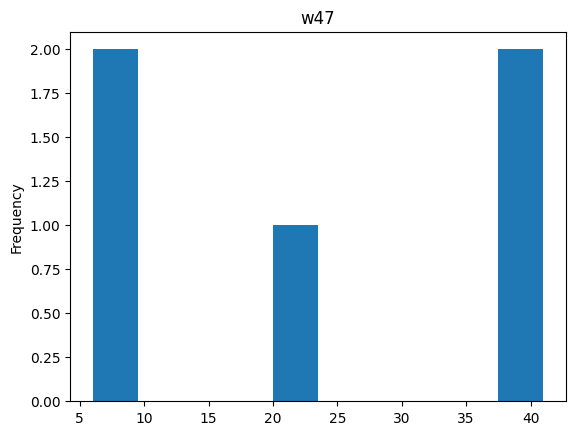


--- Column: w48 ---
count     4.000000
mean     20.000000
std      14.628739
min       8.000000
25%       8.750000
50%      16.500000
75%      27.750000
max      39.000000
Name: w48, dtype: float64


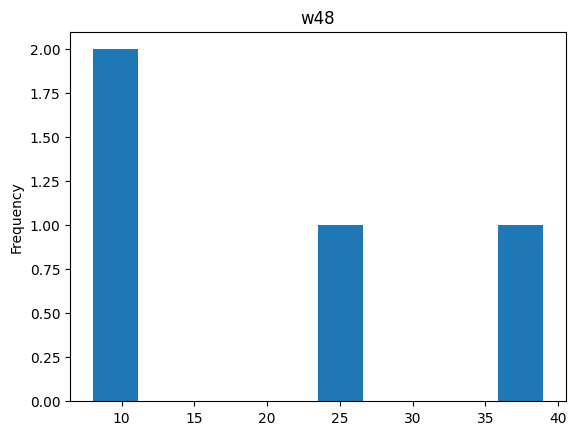


--- Column: w49 ---
count     4.000000
mean     22.000000
std      16.062378
min       9.000000
25%       9.000000
50%      18.500000
75%      31.500000
max      42.000000
Name: w49, dtype: float64


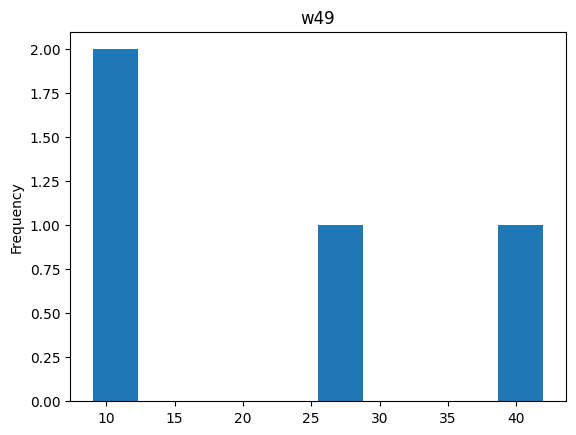


--- Column: w50 ---
count     4.000000
mean     26.000000
std      18.529256
min      10.000000
25%      11.500000
50%      22.500000
75%      37.000000
max      49.000000
Name: w50, dtype: float64


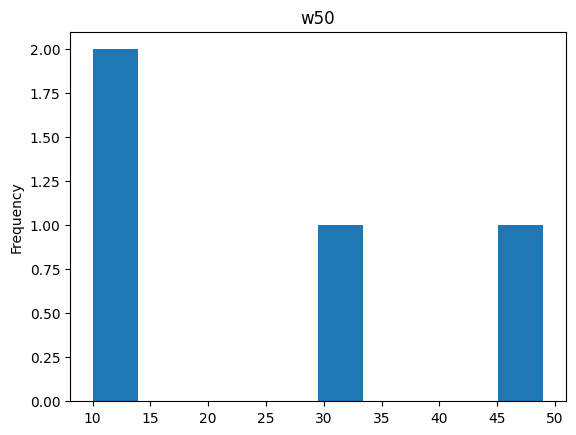


--- Column: w51 ---
count     4.000000
mean     29.250000
std      18.997807
min      12.000000
25%      13.500000
50%      28.000000
75%      43.750000
max      49.000000
Name: w51, dtype: float64


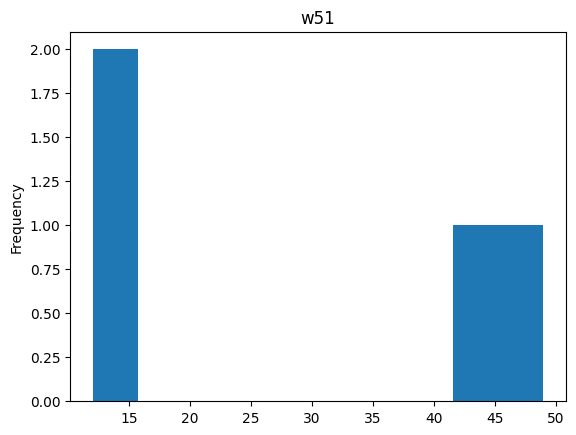


--- Column: w52 ---
count     4.000000
mean     30.250000
std      17.211914
min      15.000000
25%      15.750000
50%      29.000000
75%      43.500000
max      48.000000
Name: w52, dtype: float64


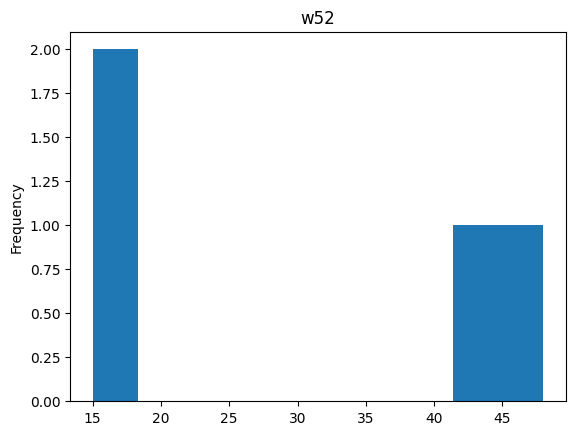


--- Column: w53 ---
count     4.000000
mean     33.250000
std      17.095321
min      17.000000
25%      19.250000
50%      33.500000
75%      47.500000
max      49.000000
Name: w53, dtype: float64


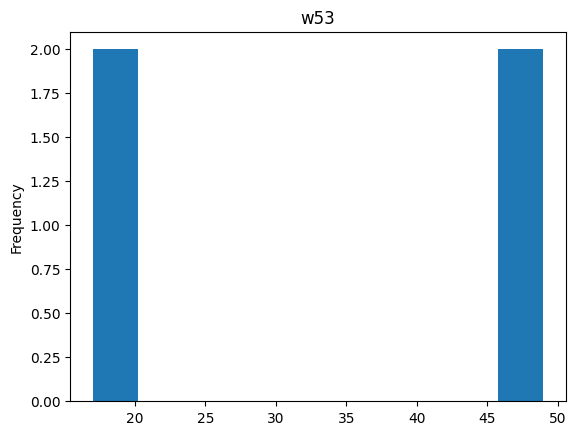


--- Column: w54 ---
count     2.000000
mean     19.500000
std       3.535534
min      17.000000
25%      18.250000
50%      19.500000
75%      20.750000
max      22.000000
Name: w54, dtype: float64


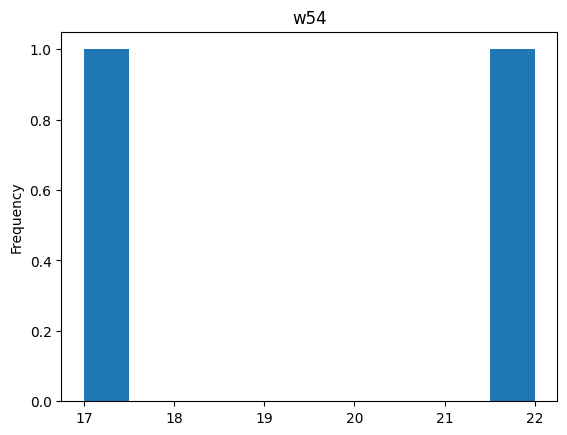


--- Column: w55 ---
count     2.000000
mean     21.500000
std       0.707107
min      21.000000
25%      21.250000
50%      21.500000
75%      21.750000
max      22.000000
Name: w55, dtype: float64


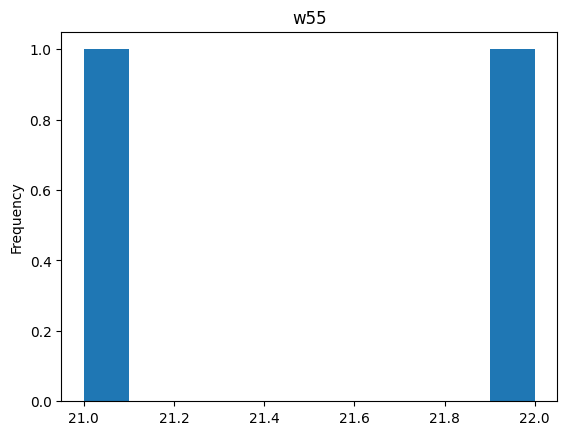


--- Column: w56 ---
count     2.000000
mean     25.500000
std       0.707107
min      25.000000
25%      25.250000
50%      25.500000
75%      25.750000
max      26.000000
Name: w56, dtype: float64


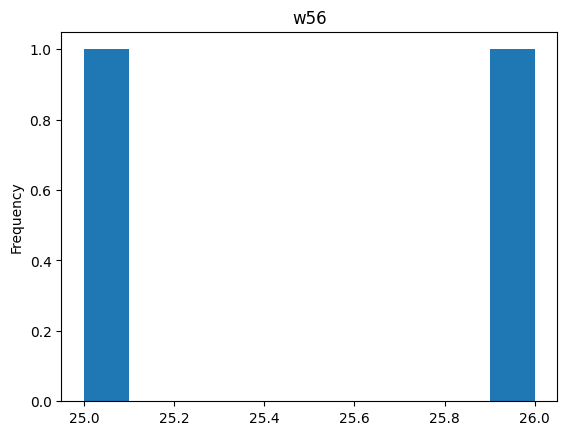


--- Column: w57 ---
count     2.00000
mean     27.50000
std       2.12132
min      26.00000
25%      26.75000
50%      27.50000
75%      28.25000
max      29.00000
Name: w57, dtype: float64


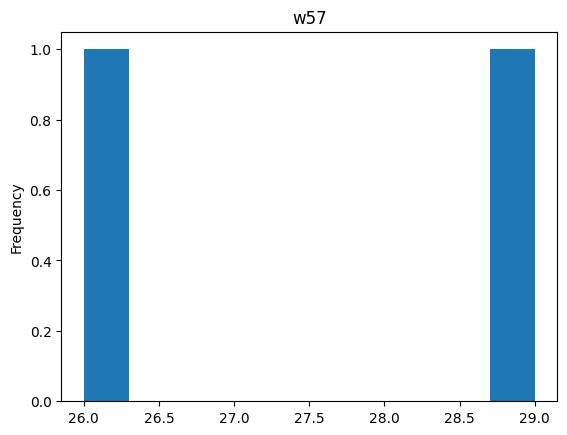


--- Column: w58 ---
count     2.000000
mean     31.500000
std       0.707107
min      31.000000
25%      31.250000
50%      31.500000
75%      31.750000
max      32.000000
Name: w58, dtype: float64


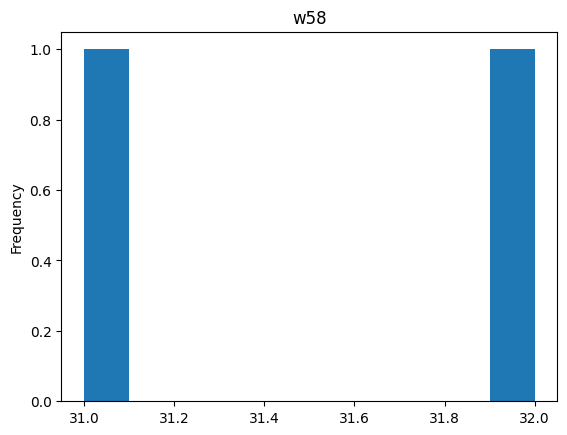


--- Column: w59 ---
count     2.000000
mean     35.500000
std       4.949747
min      32.000000
25%      33.750000
50%      35.500000
75%      37.250000
max      39.000000
Name: w59, dtype: float64


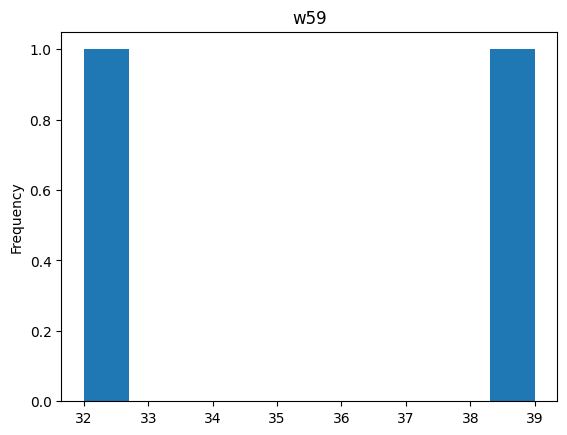


--- Column: w60 ---
count     2.000000
mean     38.000000
std       1.414214
min      37.000000
25%      37.500000
50%      38.000000
75%      38.500000
max      39.000000
Name: w60, dtype: float64


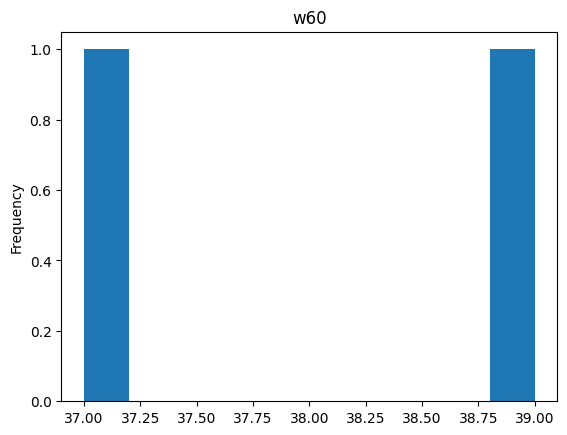


--- Column: w61 ---
count     2.000000
mean     42.500000
std       0.707107
min      42.000000
25%      42.250000
50%      42.500000
75%      42.750000
max      43.000000
Name: w61, dtype: float64


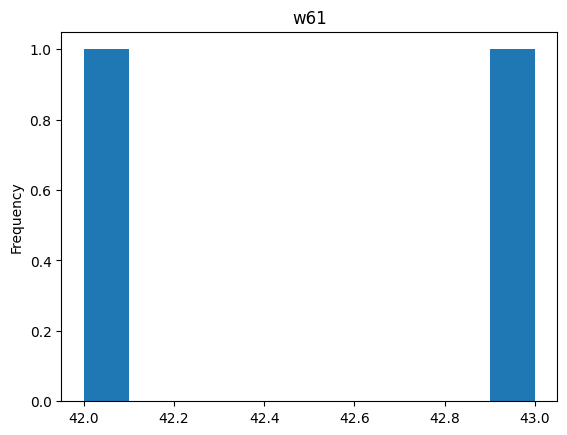


--- Column: w62 ---
count     2.000000
mean     44.500000
std       3.535534
min      42.000000
25%      43.250000
50%      44.500000
75%      45.750000
max      47.000000
Name: w62, dtype: float64


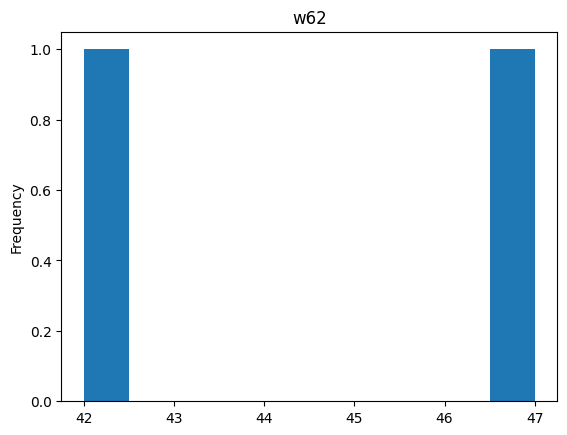


--- Column: w63 ---
count     2.000000
mean     47.500000
std       3.535534
min      45.000000
25%      46.250000
50%      47.500000
75%      48.750000
max      50.000000
Name: w63, dtype: float64


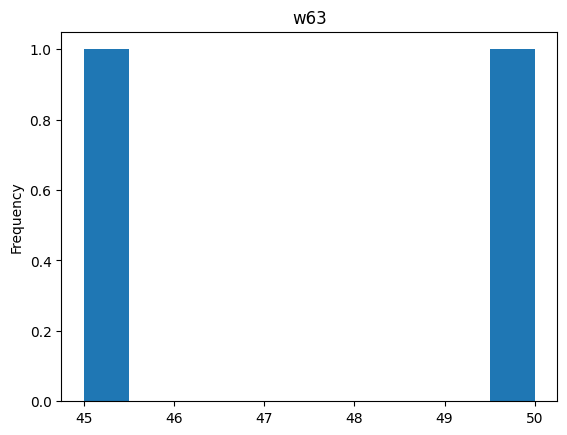


--- Column: w64 ---
count     2.0
mean     50.0
std       0.0
min      50.0
25%      50.0
50%      50.0
75%      50.0
max      50.0
Name: w64, dtype: float64


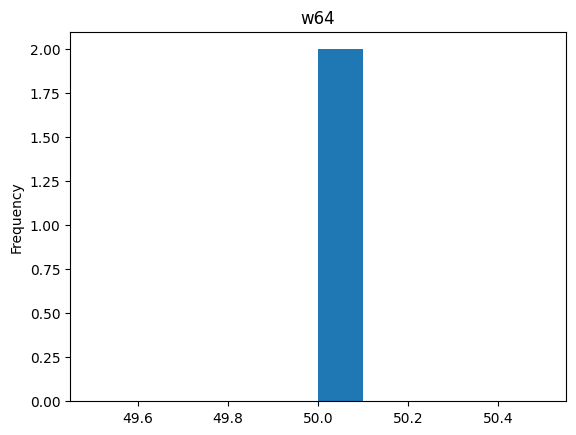


--- Column: w65 ---
count     1.0
mean     49.0
std       NaN
min      49.0
25%      49.0
50%      49.0
75%      49.0
max      49.0
Name: w65, dtype: float64


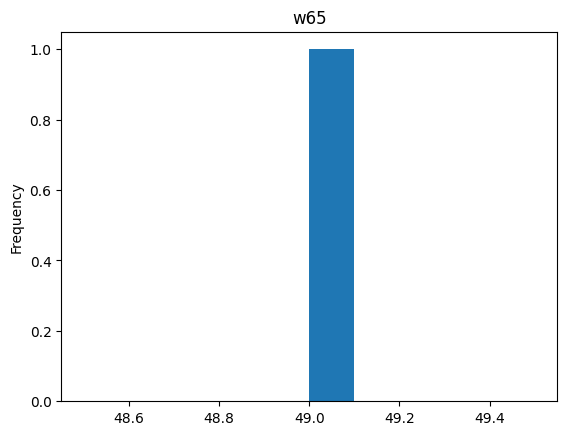

In [22]:
import matplotlib.pyplot as plt

for col in billboard_df.columns[billboard_df.columns.str.startswith('w')]:
    print(f"\n--- Column: {col} ---")
    print(billboard_df[col].describe())
    billboard_df[col].plot.hist(title=col)
    plt.show()

    c)	The dataset is in wide format, use an appropriate function to switch to a long fromat, and name the melted dataframe mlt_df.

In [26]:
mlt_df = billboard_df.melt(
    id_vars=["artist", "track", "time",	"date_e"],
    value_vars=billboard_df.columns[billboard_df.columns.str.startswith('w')],
    var_name='W',
    value_name='Value'
)
mlt_df

,artist,track,time,date_e,W,Value
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,w1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,w1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,w1,71.0
3,Madonna,Music,3:45,2000-08-12,w1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,w1,57.0
...,...,...,...,...,...,...
20600,Ghostface Killah,Cherchez LaGhost,3:04,2000-08-05,w65,NaN
20601,"Smith, Will",Freakin' It,3:58,2000-02-12,w65,NaN
20602,Zombie Nation,Kernkraft 400,3:30,2000-09-02,w65,NaN
20603,"Eastsidaz, The",Got Beef,3:58,2000-07-01,w65,NaN


    d)	Write a code that shows mlt_df‘s every 1200 rows.

In [27]:
mlt_df[0:20605:1200]

,artist,track,time,date_e,W,Value
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,w1,78.0
1200,Limp Bizkit,N 2 Gether Now,3:55,1999-12-04,w4,78.0
2400,"Urban, Keith",Your Everything,4:10,2000-07-15,w8,59.0
3600,Mary Mary,Shackles (Praise You),3:12,2000-03-25,w12,39.0
4800,Pink,There U Go,3:23,2000-03-04,w16,14.0
6000,"Levert, Gerald",Baby U Are,4:10,2000-08-19,w19,NaN
7200,Jay-Z,Do It Again (Put Ya Hands Up),3:47,2000-01-15,w23,NaN
8400,"Tippin, Aaron",Kiss This,2:53,2000-08-26,w27,NaN
9600,"Rimes, LeAnn",Big Deal,3:03,1999-10-16,w31,NaN
10800,98¡,Give Me Just One Night (Una Noche),3:24,2000-08-19,w35,NaN


    e)	Run the following code first and answer the question. Could you have done this by using Boolean masking too?

In [28]:
mlt_df.query('artist == "Spears, Britney"')

,artist,track,time,date_e,W,Value
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
63,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w1,76.0
93,"Spears, Britney",Lucky,3:23,2000-08-12,w1,61.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
380,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w2,59.0
...,...,...,...,...,...,...
20034,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w64,NaN
20064,"Spears, Britney",Lucky,3:23,2000-08-12,w64,NaN
20339,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w65,NaN
20351,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w65,NaN


Could have done this by using Boolean masking too?

Answer:

In [30]:
BM = mlt_df.artist == "Spears, Britney"
mlt_df[BM]

,artist,track,time,date_e,W,Value
51,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w1,67.0
63,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w1,76.0
93,"Spears, Britney",Lucky,3:23,2000-08-12,w1,61.0
368,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w2,38.0
380,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w2,59.0
...,...,...,...,...,...,...
20034,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w64,NaN
20064,"Spears, Britney",Lucky,3:23,2000-08-12,w64,NaN
20339,"Spears, Britney",Oops!.. I Did It Again,3:30,2000-04-22,w65,NaN
20351,"Spears, Britney",From The Bottom Of My Broken Heart,4:30,2000-01-29,w65,NaN


    f)	 Use either the approach in e or the Boolean mask, to extract all the unique songs that Britney Spears has in this dataset.

In [33]:
mlt_df[BM].track.unique()

array(['Oops!.. I Did It Again', 'From The Bottom Of My Broken Heart',
       'Lucky'], dtype=object)

    g)	In mlt_df show all of the weeks that the song “Oops!.. I Did It Again” was on the top-100

In [44]:
BM2 = mlt_df.track == "Oops!.. I Did It Again"
BM3 = mlt_df.Value <= 100
print(mlt_df[BM & BM2 & BM3])
mlt_df[BM & BM2 & BM3].W.unique()

               artist                   track  time      date_e    W  Value
51    Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w1   67.0
368   Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w2   38.0
685   Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w3   26.0
1002  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w4   19.0
1319  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w5   15.0
1636  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w6   13.0
1953  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w7   12.0
2270  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w8    9.0
2587  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22   w9    9.0
2904  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22  w10   10.0
3221  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22  w11   14.0
3538  Spears, Britney  Oops!.. I Did It Again  3:30  2000-04-22  w12   15.0
3855  Spears

array(['w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10', 'w11',
       'w12', 'w13', 'w14', 'w15', 'w16', 'w17', 'w18', 'w19', 'w20'],
      dtype=object)

##### Excercise 4 

We will use LaqnData.csv for this exercise. Each row of this dataset shows an hourly measurement recording of one of the five following air pollutants: NO, NO2, NOX, PM10, and PM2.5. The data was collected in a location in Londan for the entirety of year 2017. Read the data using Pandas and perform the following tasks.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

air_df = pd.read_csv('LaqnData.csv')
air_df

,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R
...,...,...,...,...,...,...
43795,CT3,PM2.5,31/12/2017 19:00,-2.0,ug m-3,R
43796,CT3,PM2.5,31/12/2017 20:00,6.0,ug m-3,R
43797,CT3,PM2.5,31/12/2017 21:00,5.0,ug m-3,R
43798,CT3,PM2.5,31/12/2017 22:00,5.0,ug m-3,R


    a)	The dataset has 6 columns. Three of them, naming ‘Site','Units','Provisional or Ratified' are not adding any informational values as they are the same across the whole dataset. Use the following code to drop them. 

In [49]:
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)
air_df

,Species,ReadingDateTime,Value
0,NO,01/01/2017 00:00,3.5
1,NO,01/01/2017 01:00,3.6
2,NO,01/01/2017 02:00,2.2
3,NO,01/01/2017 03:00,2.1
4,NO,01/01/2017 04:00,3.3
...,...,...,...
43795,PM2.5,31/12/2017 19:00,-2.0
43796,PM2.5,31/12/2017 20:00,6.0
43797,PM2.5,31/12/2017 21:00,5.0
43798,PM2.5,31/12/2017 22:00,5.0


    b)	The dataset is in a long format. Apply the appropriate function to switch it to the wide format. Name the transformed Dataframe, pvt_df. 

In [51]:
pvt_df = air_df.pivot(
    index="ReadingDateTime",
    columns="Species",
    values="Value"
)
pvt_df

Species,NO,NO2,NOX,PM10,PM2.5
ReadingDateTime,,,,,
01/01/2017 00:00,3.5,30.8,36.2,35.7,NaN
01/01/2017 01:00,3.6,31.5,37.0,28.5,NaN
01/01/2017 02:00,2.2,27.3,30.7,22.7,NaN
01/01/2017 03:00,2.1,23.5,26.8,20.5,NaN
01/01/2017 04:00,3.3,28.0,33.0,22.1,NaN
...,...,...,...,...,...
31/12/2017 19:00,0.7,17.5,18.5,16.3,-2.0
31/12/2017 20:00,0.7,17.5,18.6,14.5,6.0
31/12/2017 21:00,0.7,14.1,15.1,8.6,5.0


    c)	Draw and study the histogram and boxplots for columns of pvt_df.


--- Column: NO ---
count    8660.000000
mean       15.045115
std        26.678565
min        -2.000000
25%         3.100000
50%         7.100000
75%        15.500000
max       401.799990
Name: NO, dtype: float64


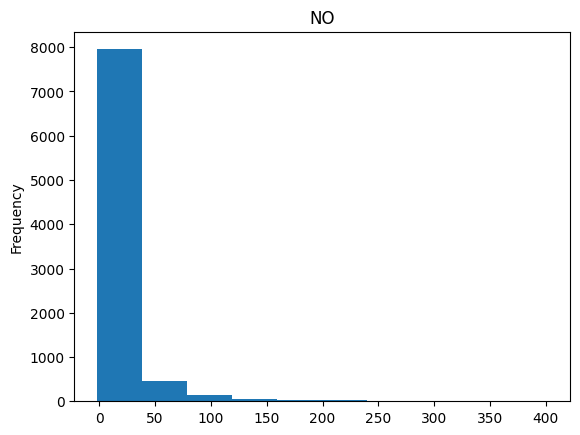

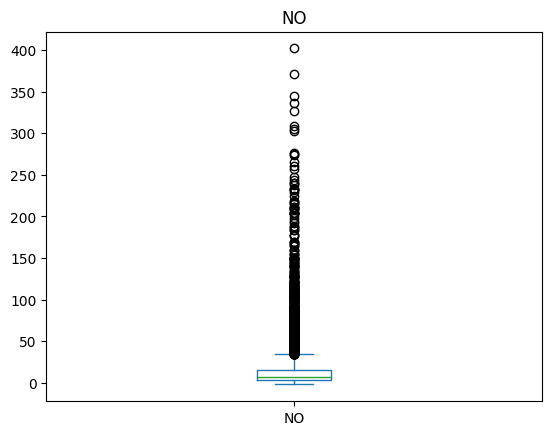


--- Column: NO2 ---
count    8660.000000
mean       38.010185
std        18.580841
min         2.800000
25%        23.800000
50%        35.300000
75%        49.900000
max       120.200000
Name: NO2, dtype: float64


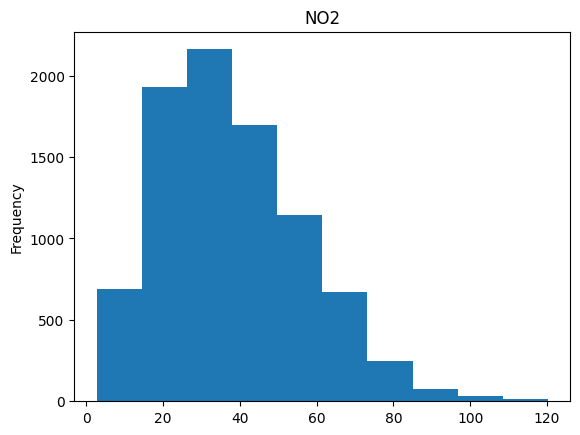

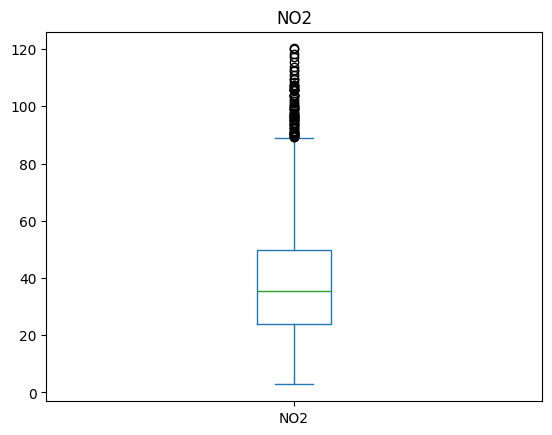


--- Column: NOX ---
count    8660.000000
mean       61.078661
std        54.584805
min         1.000000
25%        30.300000
50%        46.900000
75%        73.800000
max       734.299990
Name: NOX, dtype: float64


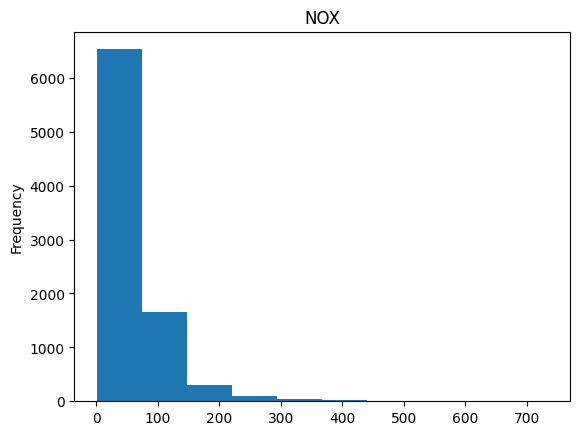

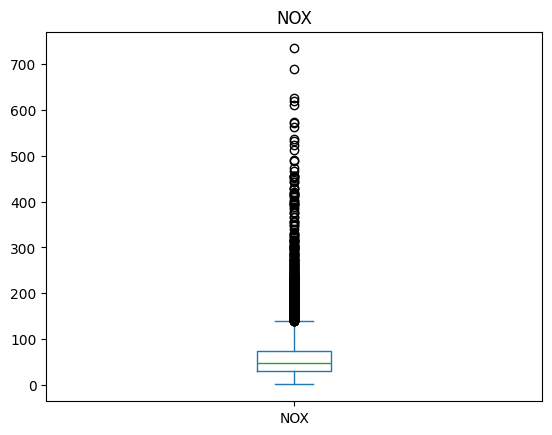


--- Column: PM10 ---
count    8657.000000
mean       22.551704
std        15.344755
min        -5.600000
25%        13.900000
50%        19.500000
75%        27.300000
max       633.099980
Name: PM10, dtype: float64


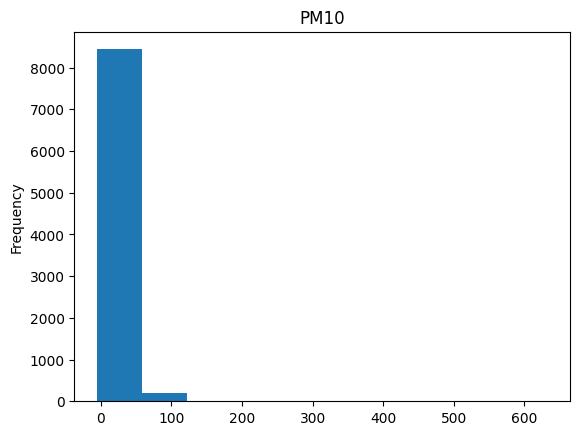

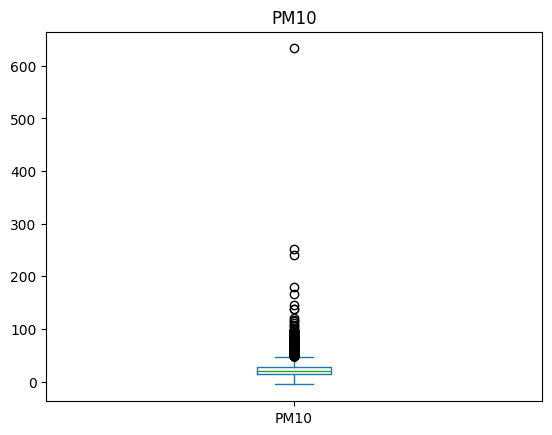


--- Column: PM2.5 ---
count    5933.000000
mean       14.999831
std        13.558588
min        -8.000000
25%         7.000000
50%        11.000000
75%        18.000000
max       128.000000
Name: PM2.5, dtype: float64


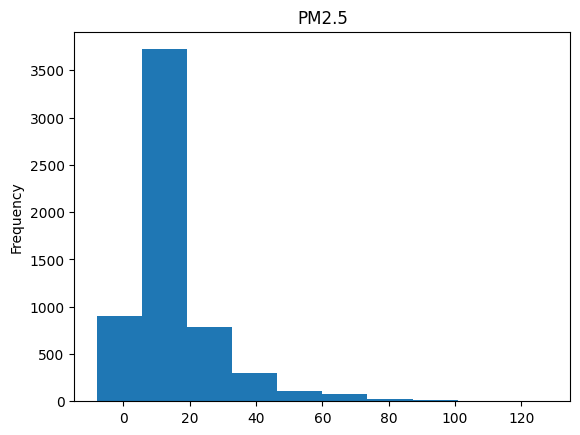

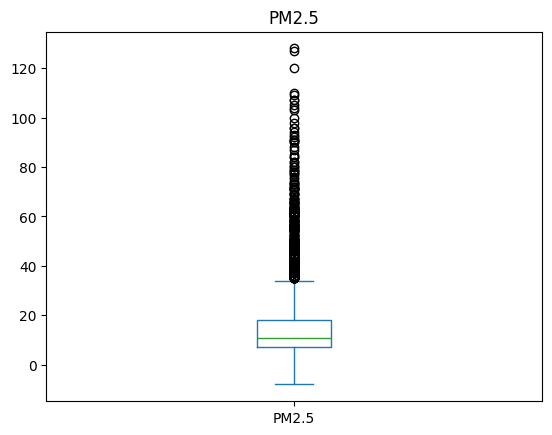

In [55]:
import matplotlib.pyplot as plt

for col in pvt_df:
    print(f"\n--- Column: {col} ---")
    print(pvt_df[col].describe())
    pvt_df[col].plot.hist(title=col)
    plt.show()
    pvt_df[col].plot.box(title=col)
    plt.show()

##### Excercise 5 

We will continue working with LaqnData.csv. 

    a)	Run the following code, see its output, and then study the code to answer what each line of this code does.

In [56]:
import pandas as pd
air_df = pd.read_csv('LaqnData.csv')
air_df.drop(columns=['Site','Units','Provisional or Ratified'], inplace=True)
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
datetime_df.columns = ['Date','Time']
date_df = datetime_df.Date.str.split('/',expand=True)
date_df.columns = ['Day','Month','Year']
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
air_df

,Species,Value,Day,Month,Time
0,NO,3.5,01,01,00:00
1,NO,3.6,01,01,01:00
2,NO,2.2,01,01,02:00
3,NO,2.1,01,01,03:00
4,NO,3.3,01,01,04:00
...,...,...,...,...,...
43795,PM2.5,-2.0,31,12,19:00
43796,PM2.5,6.0,31,12,20:00
43797,PM2.5,5.0,31,12,21:00
43798,PM2.5,5.0,31,12,22:00


Answer: 

- Imports the Pandas library and assigns it the alias pd for easier use.
- Reads the CSV file LaqnData.csv into a Pandas DataFrame called air_df.
- Drops unnecessary columns ('Site', 'Units', 'Provisional or Ratified') from air_df permanently (inplace=True).
- Takes the ReadingDateTime column (e.g., "01/01/2020 00:00") and splits it into two columns using space (' ') as the delimiter, expand=True ensures the split parts are returned as separate columns in a new DataFrame (datetime_df).
- Renames the columns of datetime_df to 'Date' and 'Time'.
- Takes the Date column (e.g., "01/01/2020") and splits it into three columns using / as the delimiter. The result is stored in a new DataFrame (date_df).
- Renames the columns of date_df to 'Day', 'Month', and 'Year'.
- Joins the new columns (Day, Month, Time) back to the original air_df. Drops the original ReadingDateTime and Year columns (since they are redundant after splitting).

    b)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [57]:
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value
Month Day Time  Species       
01    01  00:00 NO         3.5
          01:00 NO         3.6
          02:00 NO         2.2
          03:00 NO         2.1
          04:00 NO         3.3
...                        ...
12    31  19:00 PM2.5     -2.0
          20:00 PM2.5      6.0
          21:00 PM2.5      5.0
          22:00 PM2.5      5.0
          23:00 PM2.5      6.0

[43800 rows x 1 columns]

Answer:

Converts air_df into a MultiIndex DataFrame by setting the columns ['Month','Day','Time','Species'] as the new index levels.

    c)	Run the following code, see its output, and then study the code to answer what does this line of code do.

In [58]:
air_df.unstack()

Value                        
Species            NO   NO2   NOX  PM10 PM2.5
Month Day Time                               
01    01  00:00   3.5  30.8  36.2  35.7   NaN
          01:00   3.6  31.5  37.0  28.5   NaN
          02:00   2.2  27.3  30.7  22.7   NaN
          03:00   2.1  23.5  26.8  20.5   NaN
          04:00   3.3  28.0  33.0  22.1   NaN
...               ...   ...   ...   ...   ...
12    31  19:00   0.7  17.5  18.5  16.3  -2.0
          20:00   0.7  17.5  18.6  14.5   6.0
          21:00   0.7  14.1  15.1   8.6   5.0
          22:00   1.1  22.0  23.6  12.5   5.0
          23:00   0.9  19.4  20.7  10.4   6.0

[8760 rows x 5 columns]

Answer:

Reshapes a MultiIndex DataFrame by "pivoting" one or more levels of the row index into columns, creating a wide-format table.

    d)	Compare the output of the code above with pvt_df from Exercise 4. Are they basically the same?
    e)	Explain what are the differences and similarities between the pair .melt()/.pivot() and the pair .stack()/.unstack()? 
    f)	If you were to choose one counterpart for .melt() between .stack()/.unstack() which one would you choose?

Answer:



d) Yes
e) .melt()/.pivot() is to reshape between wide and long formats. .stack()/.unstack() is to reshape between hierarchical indexes and columns. .melt()/.pivot() input dataframes with regular columns. .stack()/.unstack() input dataframes with multiindex rows/columns.
e) Choose .stack() as the counterpart to .melt().